
# 나이브 베이즈를 이용한 스팸 분류



# PROBLEM STATEMENT

- 5,574개의 이메일 메시지가 있으며, 스팸인지 아닌지의 정보를 가지고 있다.
- 컬럼 : text, spam
- spam 컬럼의 값이 1이면 스팸이고, 0이면 스팸이 아닙니다.
- 스팸인지 아닌지 분류하는 인공지능을 만들자 - 수퍼바이즈드 러닝의 분류 문제!


# STEP #0: LIBRARIES IMPORT


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
# 구글 드라이브에 있는 것을 불러올 때
# 왼쪽에 있는 폴더 이미지 버튼을 누른 후에 
# Files 창이 뜨면 세번째 구글 드라이브 버튼을 누르면 
# drive를 마운트 한다고 나오고 간단한 인증을 하고 인증 받은 코드를 맞게 넣어주면
# 마운트가 된다
# 그리고 다시 Files 탭을 가보면 drive 가 생긴게 보임

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os를 import 해주고 구글 drive의 디렉토리로 이동한다
# chdir로 해주는데 
# 오른쪽 Files에서 day11 (열어볼 파일의 상위디렉토리에서) 
# 디렉토리에서 마우스 오른쪽 버튼을 눌러서 경로를 복사해준다 (또는 햄버거 버튼 누른다)


In [3]:
import os

In [ ]:
#

In [7]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/data-vision/day11')

# STEP #1: IMPORT DATASET

emails.csv 읽기

In [9]:
spam_df =  pd.read_csv('emails.csv')

In [10]:
 spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# STEP #2: VISUALIZE DATASET

## 스팸은 몇개이고, 아닌것은 몇개인지 확인하시오.

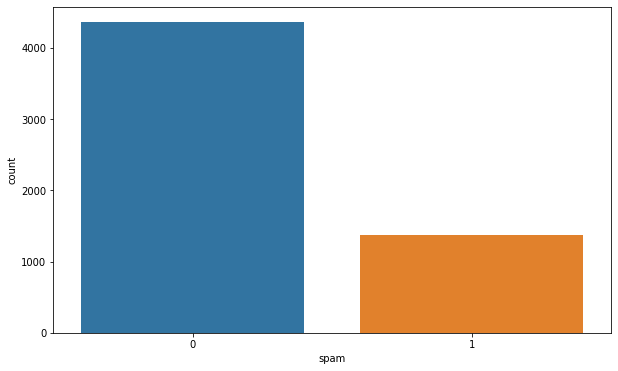

In [15]:
plt.figure(figsize=(10,6))
sb.countplot(data=spam_df, x='spam')
plt.show()

In [16]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

## 이메일의 길이가 스팸과 관련이 있는지 확인해 보려 합니다. 이메일의 문자 길이를 구해서, length 라는 컬럼을 만드세요. 

In [21]:
spam_df['length'] = spam_df['text'].str.len()
# apply() 메소드를 사용해도 됨

In [23]:
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


## 글자 길이를 히스토그램으로 나타내시오.

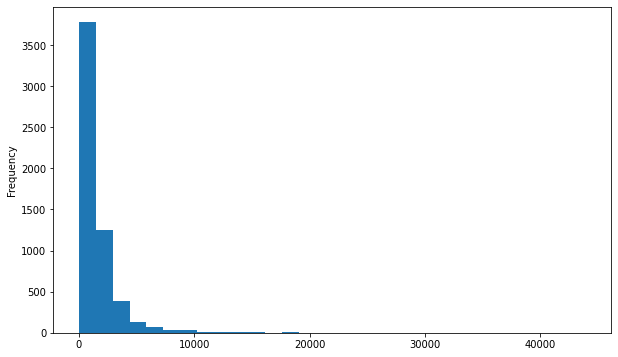

In [29]:
plt.figure(figsize=(10,6))
spam_df['length'].plot(kind='hist', bins=30)
plt.show()

## 가장 긴 이메일을 찾아서 스팸인지 아닌지 확인하고, 이메일 내용을 확인하시오.

In [ ]:
# 스팸아님

In [38]:
spam_df.loc[ spam_df.length == spam_df.length.max(), ]

,text,spam,length
2650,Subject: from the enron india newsdesk - april...,0,43952


In [37]:
spam_df.loc[ spam_df.length == spam_df.length.max(), 'text'].values[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

## 0은 스팸이 아니고, 1은 스팸입니다. 파이차트를 통해, 스팸과 스팸이 아닌것이 몇 퍼센트인지, 소수점 1자리 까지만 보여주세요.

In [50]:
# pie는 카운트를 해서 시리즈로 만들어 줘야한다
pie = spam_df['spam'].value_counts()

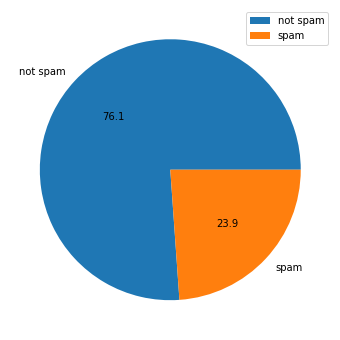

In [55]:
plt.figure(figsize=(10,6))
#label은 []리스트화 해서 넣어준다
plt.pie(pie, autopct='%.1f', labels=['not spam', 'spam'])
plt.legend()
plt.show()

## 스팸이 아닌것은 ham 변수로, 스팸인것은 spam 변수로 저장하시오.

In [57]:
spam_df.loc[ spam_df['spam'] == 1, ]

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
...,...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1,347
1364,Subject: would you like a $ 250 gas card ? do...,1,188
1365,"Subject: immediate reply needed dear sir , i...",1,3164
1366,Subject: wanna see me get fisted ? fist bang...,1,734


In [58]:
ham = spam_df.loc[ spam_df['spam'] != 1 , ]

In [59]:
spam = spam_df.loc[ spam_df['spam'] == 1, ]

In [65]:
spam.head(2)

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598


In [66]:
ham.head(2)

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997


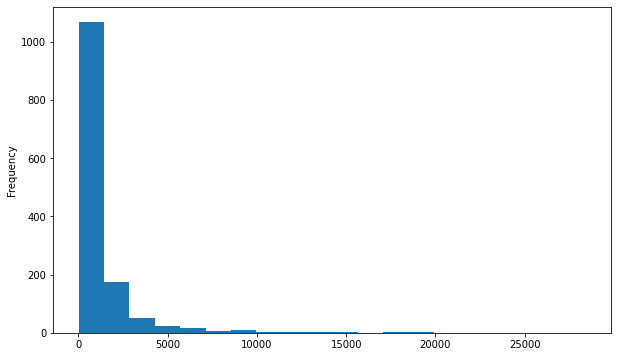

In [70]:
# 스팸의 이메일 길이를 히스토그램으로 나타내시오.
plt.figure(figsize=(10,6))
spam['length'].plot(kind='hist', bins=20)
plt.show()

In [ ]:
# 햄의 이메일 길이를 히스토그램으로 나타내시오.

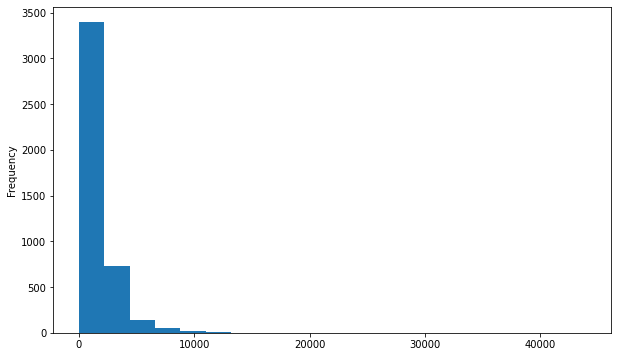

In [72]:
plt.figure(figsize=(10,6))
ham['length'].plot(kind='hist', bins=20)
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 쉼표, 마침표 등의 구두점 제거하기

import string
마침표,쉼표 등을 쉽게 제거할 수 있음
미리 정의된 punctation 속성을 사용

In [81]:
import string as st

In [82]:
# 구두점 관련 특수기호를 이미 만들어져있음
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
test = "Hello Mr. future, I am so happy to be learning AI now!~~!~"

### 위의 문장에서, 글자를 앞에서부터 하나씩 가져와서, 구두점인지 확인한 후, 구두점이 아닌 문자만 리스트로 저장하시오.

In [ ]:
# 결과 예시)   [ 'H', 'e', 'l', ...  'M', 'r', ' ','F' ... ]

In [87]:
#comprehenced lists?
Test_punc_removed = []
for char in test:
  if char not in st.punctuation:
    Test_punc_removed.append(char)

Test_punc_removed


['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'f',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [89]:
# 리스트로 가공해서 다시 리스트로 만드는 것
# 1. for문을 먼저 써주고
# 2. if문이 있으면 for옆에 넣어준다
# 3. 실행할 커맨드를 맨 앞에 넣어 준다
# 위의 for문과 같은 결과가 나온다
Test_punc_removed = [ char for char in test if char not in st.punctuation ]

### 위의 리스트에 있는 문자들을, 하나의 문자열로 만드시오.
### 결과 예시) 'Hello Mr Future ...'

In [91]:
# 리스트에 있는 문자들을 하나의 문자열로 만들어 준다
# join 앞에 있는 ' ' 공백이나, '?'를 넣어 주면 그대로 만들어 진다
# ''.join()으로 하면 공백 없이 하나의 문자열로 만들어 준다 (리스트에서 문자열로)
#Test_punc_removed_join = ' '.join(Test_punc_removed)
Test_punc_removed_join = ''.join(Test_punc_removed)

In [92]:
Test_punc_removed_join

'Hello Mr future I am so happy to be learning AI now'

In [93]:
test

'Hello Mr. future, I am so happy to be learning AI now!~~!~'

# STEP 3.2 STOPWORDS(불용어) 제거하기
### Stopwords (불용어) 란? - https://bit.ly/34Ipha2

In [95]:
import nltk

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [97]:
#corpus =말뭉치
from nltk.corpus import stopwords

In [ ]:
#영어의 stopwords를 보여줌 
#한글은 없음
stopwords.words('english')

In [102]:
stop_list = stopwords.words('english')

### 구두점 제거한 문자열을, 이제 불용어 단어에 해당하지 않는 단어들만 모아서 리스트로 만드시오.
### 결과 예시) ['Hello', 'Mr', 'Future' ... ]

In [ ]:
#Test_punc_removed_join_clean = 

In [ ]:
test_punc_removed_list = Test_punc_removed_join.split()
Test_punc_removed_join_clean = []

In [127]:
for stopword in test_punc_removed_list:
   if stopword not in stop_list:
     Test_punc_removed_join_clean.append(stopword)

In [128]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'future', 'I', 'happy', 'learning', 'AI']

In [ ]:
stop_list

# STEP 3.3 COUNT VECTORIZER 

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
sample = ['This is the first document', 'I loved them',
          'This document is the seconde document',
          'I am loving you',
          'And this is the third one.']

In [132]:
vectorizer = CountVectorizer()

In [134]:
X = vectorizer.fit_transform(sample)

In [135]:
# 학습한 모든 단어를 보여준다 .get_feature_names()  / 중복단어는 제거됨
vectorizer.get_feature_names()

['am',
 'and',
 'document',
 'first',
 'is',
 'loved',
 'loving',
 'one',
 'seconde',
 'the',
 'them',
 'third',
 'this',
 'you']

In [136]:
len(vectorizer.get_feature_names())
# 총 사용한 단어 수 
# 이제 Count Vectorize를 하면 단어 수만큼 컬럼이 생기게 된다

14

In [138]:
# toarray()  배열로 보여준다
X.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]])

In [139]:
print(vectorizer.get_feature_names())

['am', 'and', 'document', 'first', 'is', 'loved', 'loving', 'one', 'seconde', 'the', 'them', 'third', 'this', 'you']


In [ ]:
# 위의 단어 하나당 row가 되고 단어수만큼 컬럼이 생김 14개의 컬럼이 생기고 
# 해당 row의 한 단어에 해당하는게 있으면 카운트가 된다

# 이제, 우리의 데이터프레임에 있는, 이메일 내용을 Cleaning 한다.

In [ ]:
# 여러개를 하나로 묶는 것을 pipelining / 함수 단위로 묶거나, 시스템 단위로 묶거나 한다

#1. 구두점 제거
#2. 불용어 제거

# 위의 2가지 기능을 함수로 하나로 묶어서 만든것 

In [163]:
def message_cleaning(message):
  Test_punc_removed = []
  for char in message:
    if char not in st.punctuation:
      Test_punc_removed.append(char)
  
  Test_punc_removed_join = ''.join(Test_punc_removed)
  test_punc_removed_list = Test_punc_removed_join.split()
  
  Test_punc_removed_join_clean = []
  for word in test_punc_removed_list:
   if word.lower() not in stop_list:
     Test_punc_removed_join_clean.append(word) 
    
  return Test_punc_removed_join_clean



In [164]:
#한줄로 만들기
def msg_cleaning(message):
  Test_punc_removed = [ char for char in message if char not in st.punctuation ]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stop_list ]

  return Test_punc_removed_join_clean

In [141]:
message_cleaning("Hello,. this is test 1. coding in python ~~..")

['Hello', 'test', '1', 'coding', 'python']

In [144]:
msg_cleaning("Hello,. this is test 1. coding in python ~~..")

['Hello', 'test', '1', 'coding', 'python']

# 이메일의 내용을 벡터라이징 한다.

In [147]:
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [165]:
spam_df.text.apply(message_cleaning)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

이메일의 내용을 벡터라이징 한다

In [159]:
# analyzer= 파라미터는 카운트벡터라이즈 하기전에 수행해 준다
# 여기에 사용자 함수 만들었던 것을 message_cleaning 을 넣어준다
# 객체 생성ㅇ
vectorizer = CountVectorizer( analyzer = message_cleaning)

In [166]:
spanham_countVectorizer = vectorizer.fit_transform(spam_df['text'])

In [172]:
len((vectorizer.get_feature_names()))

37229


In [174]:
spanham_countVectorizer.toarray().shape

(5728, 37229)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [175]:
from sklearn.naive_bayes import MultinomialNB

In [179]:
from sklearn.naive_bayes import GaussianNB
# naive_bayes에 GaussianNB 도 있음 
# 더 좋은 결과가 나오는 것을 사용하면 됨

In [219]:
classifier = MultinomialNB()

In [220]:
classifier.fit( spanham_countVectorizer, spam_df['spam'].values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

feature scaling은 만약 큰 수가 100이 넘어가면 
할 수도 있는데 
일단 해보고 더 좋은 것을 사용하면 된다
만약 feature scaling을 했다면 다른 데이터 예측할 때도 같이 작업해 줘야함

### 다음 2개의 문장을 테스트 해보시오.


In [183]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]

In [185]:
# fit_transform을 하면 위의 testing_sample 만 가지고 학습을 변환을 하기 때문에 주의!
# transform()을 해야지 위의 teseting_sample을 기존 3만 몇개로 숫자로 변환된 것에 맞춰서 변환됨
testing1 = vectorizer.transform(testing_sample)

In [186]:
testing1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [189]:
classifier.predict(testing1)

array([1, 0])

In [188]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [190]:
testing2 = vectorizer.transform(testing_sample)

In [191]:
testing2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [192]:
classifier.predict(testing2)

array([0, 1])

In [ ]:
# 위의 학습한 결과로 testing2의 2번째는 스팸으로 판별

# STEP#4: Training셋과 Test셋으로 나눠서, 학습한다. 테스트셋은 20%로 한다. 

In [195]:
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [254]:
X = spam_df['text']

In [232]:
X.head()

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

In [255]:
y = spam_df['spam']

In [256]:
# analyzer= 먼저 실행 -->쉼표 등 불필요한 단어 제거 와 불용어 제거 (사용자함수: message_cleaning)
# 그 다음 CountVectorizer 문자를 숫자로 바꿈
vectorizer = CountVectorizer( analyzer = message_cleaning)

In [257]:
X = vectorizer.fit_transform(X)

In [205]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state =123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [259]:
NB_classifier = MultinomialNB()

In [260]:
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [263]:
y_pred_nb = NB_classifier.predict(X_test)

# STEP#5: 테스트셋으로 평가한다. 분류의 문제이므로 컨퓨전 매트릭스 확인. 

In [261]:
from sklearn.metrics import confusion_matrix

In [265]:
cm = confusion_matrix(y_test, y_pred_nb)

In [266]:
cm

array([[872,  13],
       [  2, 259]])

In [267]:
(872+259) / cm.sum()

0.9869109947643979

# WordCloud Visualizing - 스팸 이메일에는 어떤 단어들이 많이 들어있는지 Visualizing

[WordCloud 활용 예](https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/g7Y/image/QoUPiRwBMJoYAppVWNhMq4v8l-o)

In [ ]:
#WordCloud도 설치가 되어 있음

In [268]:
from wordcloud import WordCloud, STOPWORDS

In [270]:
stop_words = STOPWORDS

In [291]:
stop_words.add('will')

In [292]:
wc = WordCloud(background_color='white', stopwords=stop_words, max_words=50)

In [272]:
spam.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [293]:
word_lower_list = spam['text'].str.lower().tolist()

In [294]:
words_as_one_lower = ''.join(word_lower_list)

In [276]:
# list로 만듬
text_list = spam['text'].tolist()

In [278]:
words_as_one_string = ''.join(text_list)

In [295]:
my_words = wc.generate(words_as_one_lower)

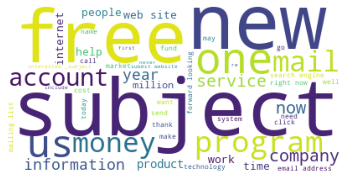

In [296]:
plt.imshow(my_words)
plt.axis('off')
plt.show()

In [ ]:
alice_mask = np.array(Image.open('09. alice_mask.png'))